In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [55]:
# Загружаем основные данные
train_df = pd.read_csv("df_merged_cleaned.csv")

In [56]:
X = train_df.drop(columns=['Цена на арматуру', 'dt'])
y = train_df['Цена на арматуру']

In [57]:
# Разделение на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
print(f"Средняя абсолютная ошибка: {mae}")




Средняя абсолютная ошибка: 2660.1713735219596


In [58]:
ypred = (model.predict(X_test))

result = pd.DataFrame({'real': y_test, 'pred': ypred})
result['error'] = result['real'] - result['pred']
result = result.sort_index()
result.tail(12)


from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(result['real'], result['pred'])
mse = mean_squared_error(result['real'], result['pred'])

print(f"MAE: {mae}")
print(f"MSE: {mse}")
rmse = mse ** 0.5
print(f"RMSE: {rmse}")

MAE: 2660.1713735219596
MSE: 16685277.693453453
RMSE: 4084.7616446316


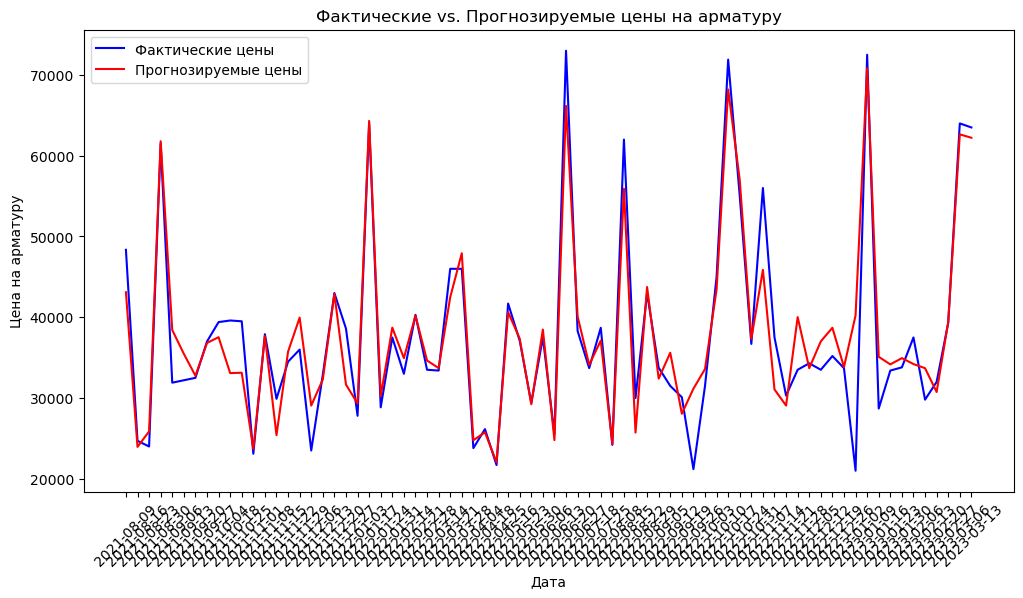

In [59]:
# Визуализация фактических и предсказанных цен
plt.figure(figsize=(12, 6))
plt.plot(train_df["dt"].iloc[-len(y_test):], y_test, label="Фактические цены", color='blue')
plt.plot(train_df["dt"].iloc[-len(y_test):], y_pred, label="Прогнозируемые цены", color='red')
plt.legend()
plt.xlabel("Дата")
plt.ylabel("Цена на арматуру")
plt.title("Фактические vs. Прогнозируемые цены на арматуру")
plt.xticks(rotation=45)
plt.show()